In [ ]:
import numpy as np
import random

import matplotlib.pyplot as plt

In [2]:
omega_m = 0.315
sig_om = 0.007


omega_ch2 = 0.120
sig_oc = 0.001


omega_bh2 = 0.0224
sig_ob = 0.0001


h0 = 67.45
sig_h0 = 0.62

In [3]:
def foo(center, sig, n=3):
	return random.uniform(center- n*sig, center+ n*sig)

def friedmann(z, h, om):
	return h*np.sqrt(om*(1+z)**3. + (1.-om))



zmin = 0.1
zmax = 1.5

nz = 80
sig = 0.008


In [4]:
for i in range(10000):

	z_arr=zmin+(zmax-zmin)*np.arange(nz)/(nz-1.0)

	h0_arr = []
	om_arr = []

	# H(z) values according to the fiducial Cosmology at each z assuming a Gaussian distribution centred on hz_model

	# temp_h0 = foo(h0, sig_h0)
	temp_h0 = random.uniform(65, 80)
	temp_om = foo(omega_m, sig_om)
	

	hz_arr = np.array([friedmann(z,temp_h0,temp_om) for z in z_arr])

	h0_arr.append(temp_h0)
	om_arr.append(temp_om)
	

	sighz_arr = hz_arr*sig


	# saving the simulated hz results in a np file
	
	filename = 'input/'+(f'data_{i+1}')
	print(f'Status: {((i+1)/10000 * 100):.2f} %', end='\r')
	

	np.save(filename, np.transpose([z_arr, hz_arr, nz*h0_arr, nz*om_arr]))
	

Visualizing the distribution of H(z) and omega_m

In [6]:
h0s = []
oms = []


for i in range(10000):
    data = np.load(f'input/data_{i+1}.npy')
    h0s.append(data[:, 2][0])
    oms.append(data[:, 3][0])

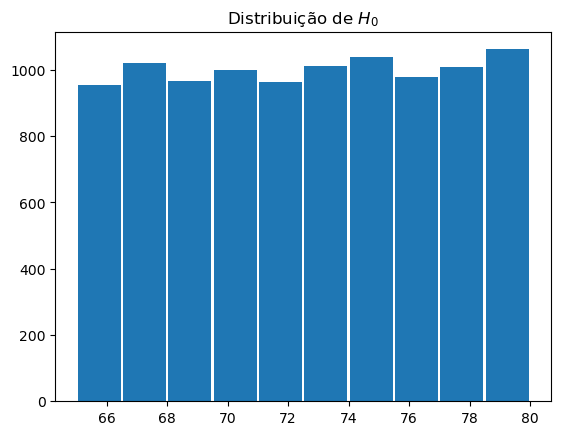

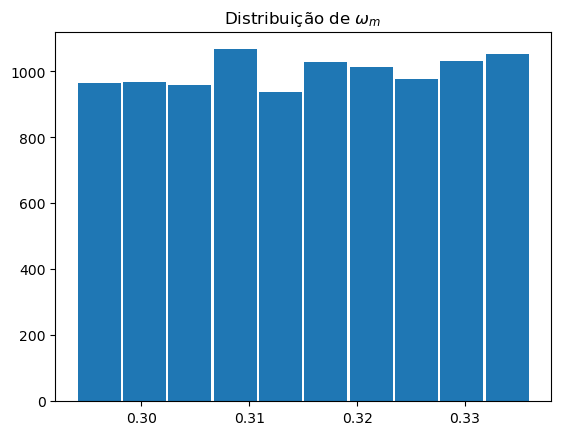

In [7]:
plt.hist(h0s, rwidth=.95)

plt.title(r'Distribuição de $H_0$')



plt.savefig('imagens/distribuição de h0')
plt.show()


plt.hist(oms, rwidth=.95)

plt.title(r'Distribuição de $\omega _m$')



plt.savefig('imagens/distribuição de omegam')
plt.show()

Creating the array with the fiducial values of H(0) and omega_m. "Our universe"

In [8]:
z_arr=zmin+(zmax-zmin)*np.arange(nz)/(nz-1.0)

asda = np.array([friedmann(z,h0,omega_m) for z in z_arr])


filename = 'input/'+(f'data_real80')


np.save(filename, np.transpose([z_arr, asda]))


In [ ]:
[h0 for i in range(80)]

In [16]:
len(asda)

80